##**EDA 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

##Q1. What is the range of selling prices in the dataset?


##Ans-A: ₹5,000 to ₹7,60,000

In [ ]:
selling_price_range = (df['selling_price'].min(), df['selling_price'].max())
print(selling_price_range)


(5000, 760000)


##Q2. What is the median selling price for bikes in the dataset?




##Ans-₹45,000

In [ ]:
median_selling_price = df['selling_price'].median()
print(median_selling_price)

45000.0


##Q3. What is the most common seller type?




##Ans-Individual

In [ ]:
most_common_seller_type = df['seller_type'].mode()[0]
print(most_common_seller_type)

Individual


##Q4. How many bikes have driven more than 50,000 kilometers?



##Ans-170 bikes

In [ ]:
bikes_above_50k_km = df[df['km_driven'] > 50000].shape[0]
print(bikes_above_50k_km)

170


##Q5. What is the average km_driven value for each ownership type?



##Ans-

##1)   1st owner: 32,817 km

##2)   2nd owner: 39,289 km

##3)   3rd owner: 33,292 km


##4)   4th owner: 3,11,500 km



In [ ]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


##Q6. What proportion of bikes are from the year 2015 or older?



##Ans-56.64%

In [ ]:
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / df.shape[0]
print(proportion_2015_or_older)

0.5664467483506126


##Q7. What is the trend of missing values across the dataset?



##Ans-Only the ex_showroom_price column has missing values (435 missing entries). All other columns have no missing data.

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


##Q8. Highest ex_showroom_price and Bike Name




##Ans-

##1.   Highest Price: ₹12,78,000


##2.   Bike Name: Harley-Davidson Street Bob



In [ ]:
df = df.dropna(subset=['ex_showroom_price'])


df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')


max_ex_price = df['ex_showroom_price'].max()


bike_with_max_price = df[df['ex_showroom_price'] == max_ex_price][['name', 'ex_showroom_price']]


print("Highest Ex-Showroom Price:", max_ex_price)
print("Bike(s) with highest ex_showroom_price:")
print(bike_with_max_price)


Highest Ex-Showroom Price: 1278000.0
Bike(s) with highest ex_showroom_price:
                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


##Q9. Total number of bikes listed by each seller type



##Ans-

##1.   Individual: 1055 bikes


##2.   Dealer: 6 bikes



In [ ]:
df['seller_type'] = df['seller_type'].astype(str).str.strip()


df = df[df['seller_type'].notna()]


seller_counts = df['seller_type'].value_counts()


print("Number of bikes listed by each seller type:")
print(seller_counts)


Number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


##Q10. Relationship between selling_price and km_driven for first-owner bikes





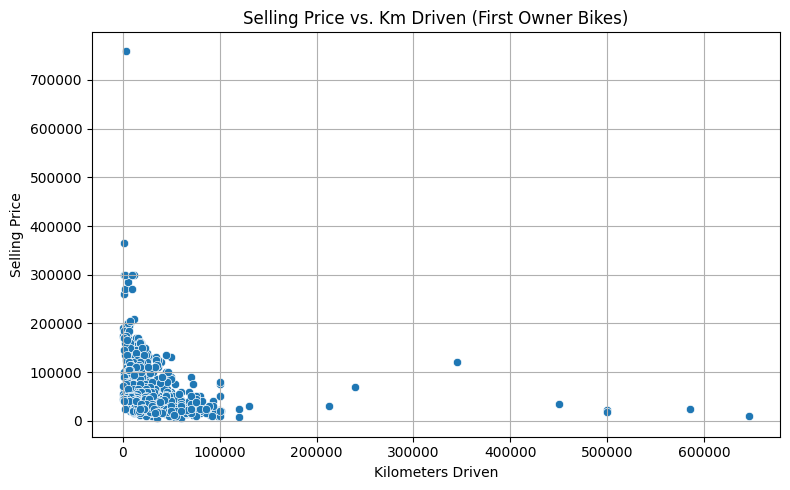

In [ ]:
df = pd.read_csv("BIKE DETAILS.csv")


df = df.dropna(subset=['owner', 'km_driven', 'selling_price'])


first_owner_df = df[df['owner'].str.strip().str.lower().str.contains("1st owner", na=False)]


plt.figure(figsize=(8, 5))
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title('Selling Price vs. Km Driven (First Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()


##Q11. Outliers in km_driven (IQR method)




##Ans-

##1.   Number of outliers detected: 39


##2.   Remaining records after removal: 1022



In [ ]:
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]


df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]



print("Number of outliers detected:", len(outliers))
print("Remaining records after outlier removal:", len(df_no_outliers))


Number of outliers detected: 39
Remaining records after outlier removal: 1022


##Q12. Bivariate analysis between year and selling_price

<Axes: xlabel='year', ylabel='selling_price'>

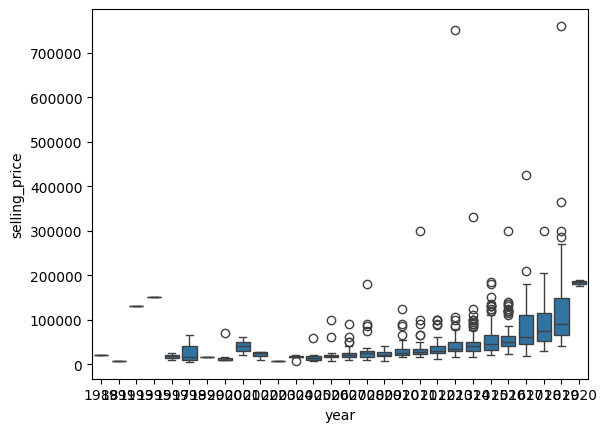

In [ ]:
sns.boxplot(data=df, x='year', y='selling_price')


##Q13. Average depreciation based on bike age



##Ans-
| Bike Age | Avg Selling Price (INR) |
| -------- | ----------------------- |
| 5 years  | ₹1,83,333.33            |
| 6 years  | ₹1,19,689.51            |
| 7 years  | ₹87,660.37              |
| 8 years  | ₹78,894.74              |
| 9 years  | ₹58,469.02              |


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Drop rows with missing 'year' or 'selling_price'
df = df.dropna(subset=['year', 'selling_price'])

# Convert 'year' to numeric if not already
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Remove rows with invalid years
df = df[df['year'].notnull()]

# Calculate bike age
df['bike_age'] = 2025 - df['year']

# Filter for bike age 5 to 9 years
filtered_df = df[df['bike_age'].isin([5, 6, 7, 8, 9])]

# Calculate average selling price (depreciation) by bike age
avg_depreciation = filtered_df.groupby('bike_age')['selling_price'].mean().reset_index()

# Display result

print(avg_depreciation)


   bike_age  selling_price
0         5  183333.333333
1         6  119689.511628
2         7   87660.374046
3         8   78894.736842
4         9   58469.018692


##Q14. Bikes priced significantly above average for their manufacturing year

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Calculate average selling price per year
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
df = df.merge(avg_price_by_year, on='year', suffixes=('', '_avg_year'))

# Mark bikes priced significantly above average (you can also use a threshold like +20%)
df['above_avg'] = df['selling_price'] > df['selling_price_avg_year']

# Filter high-priced bikes
high_priced_bikes = df[df['above_avg']][['name', 'year', 'selling_price', 'selling_price_avg_year']]
print(high_priced_bikes.sort_values(by='selling_price', ascending=False).head(10))


                                 name  year  selling_price  \
295                   Suzuki GSX S750  2019         760000   
134        Harley-Davidson Street Bob  2013         750000   
289    Kawasaki Ninja 650 [2018-2019]  2017         425000   
13                      Yamaha YZF R3  2019         365000   
311        Harley-Davidson Street 750  2014         330000   
860    Kawasaki Ninja 650 [2018-2019]  2011         300000   
897                Kawasaki Ninja 300  2016         300000   
344                        BMW G310GS  2018         300000   
130  Royal Enfield Continental GT 650  2019         299000   
315     Royal Enfield Interceptor 650  2019         285000   

     selling_price_avg_year  
295           119689.511628  
134            51136.986301  
289            78894.736842  
13            119689.511628  
311            48668.131868  
860            35655.721311  
897            58469.018692  
344            87660.374046  
130           119689.511628  
315           119

##Q15. Correlation matrix for numeric columns and heatmap

                        selling_price      year  km_driven  ex_showroom_price  \
selling_price                1.000000  0.402188  -0.212937           0.918583   
year                         0.402188  1.000000  -0.288675           0.126378   
km_driven                   -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price            0.918583  0.126378  -0.122011           1.000000   
selling_price_avg_year       0.501140  0.802547  -0.309402           0.146598   

                        selling_price_avg_year  
selling_price                         0.501140  
year                                  0.802547  
km_driven                            -0.309402  
ex_showroom_price                     0.146598  
selling_price_avg_year                1.000000  


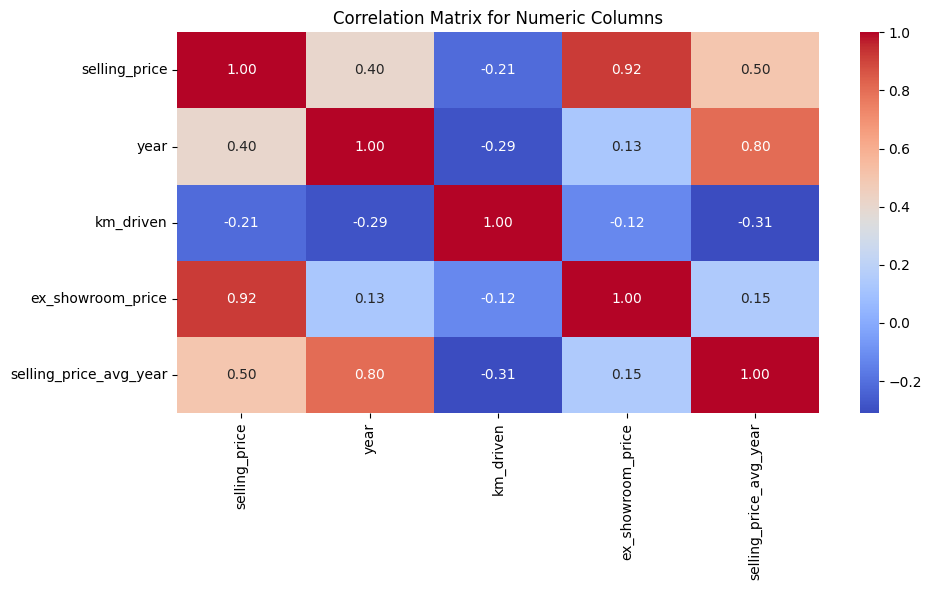

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Columns')
plt.tight_layout()
plt.show()


##**EDA 2**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Car Sale.csv")

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Engine'] = df['Engine'].str.replace('Â', '', regex=False).str.strip()
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip().str.title())


##Q1: Average Selling Price by Dealer

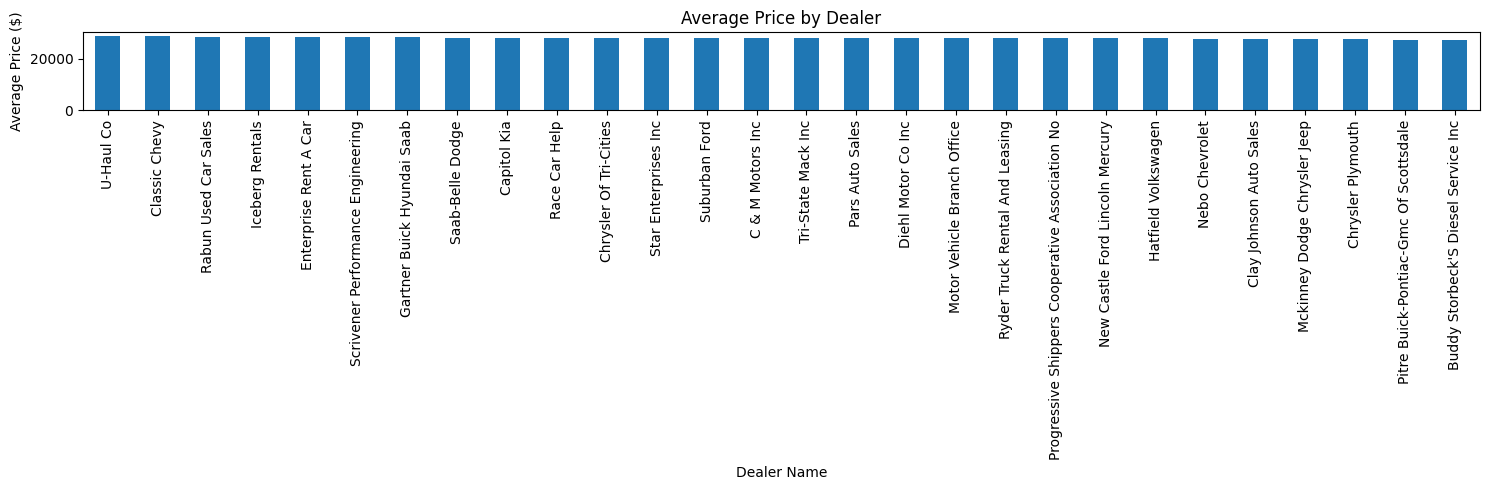

In [ ]:
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
dealer_avg_price.plot(kind='bar', figsize=(15, 5), title='Average Price by Dealer', ylabel='Average Price ($)', xlabel='Dealer Name')
plt.tight_layout()
plt.show()


##Q2: Car Brand with Highest Price Variation

Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


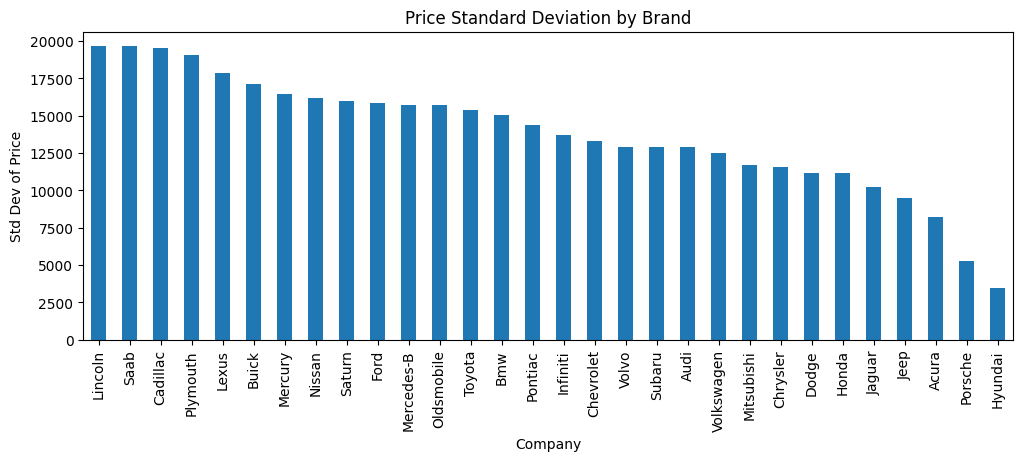

In [ ]:
brand_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(brand_variation.head())

brand_variation.plot(kind='bar', figsize=(12, 4), title='Price Standard Deviation by Brand')
plt.ylabel('Std Dev of Price')
plt.show()


##Q3: Price Distribution by Transmission Type

<ipython-input-39-f864cf3d947e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='Set2')


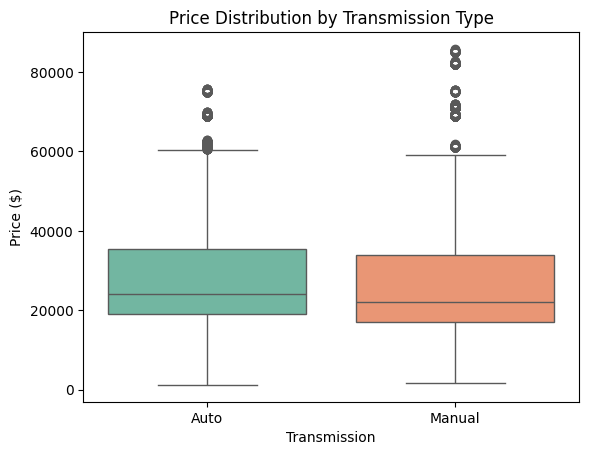

In [ ]:
sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='Set2')
plt.title('Price Distribution by Transmission Type')
plt.show()


##Q4: Price Distribution Across Regions


<ipython-input-40-4d12c687dd14>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='Set3')


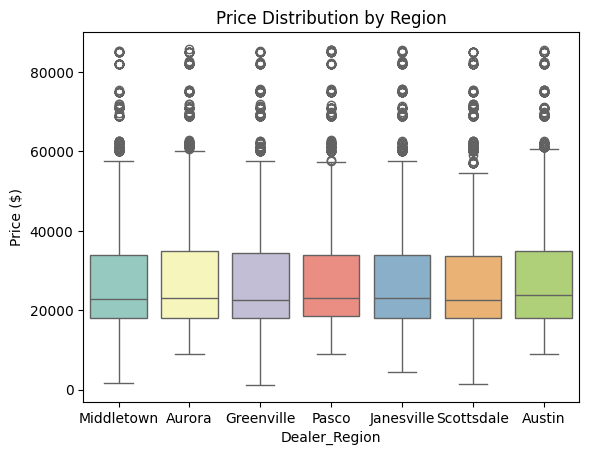

In [ ]:
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='Set3')
plt.title('Price Distribution by Region')
plt.show()


##Q5: Car Distribution by Body Styles

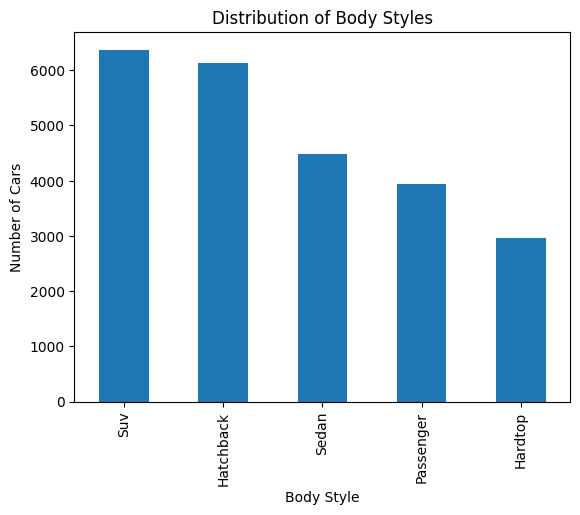

In [ ]:
df['Body Style'].value_counts().plot(kind='bar', title='Distribution of Body Styles')
plt.ylabel('Number of Cars')
plt.show()


##Q6: Avg Price by Gender & Income

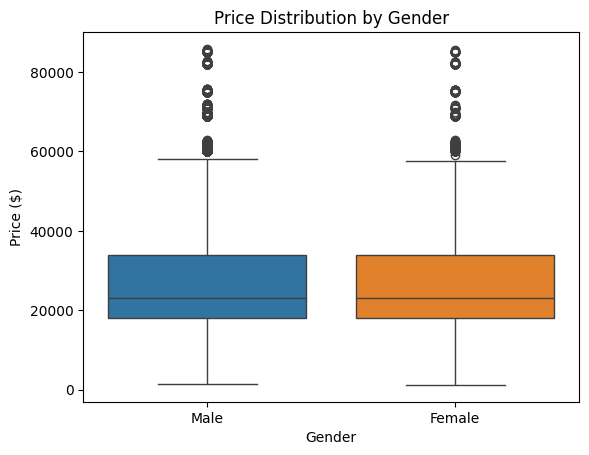

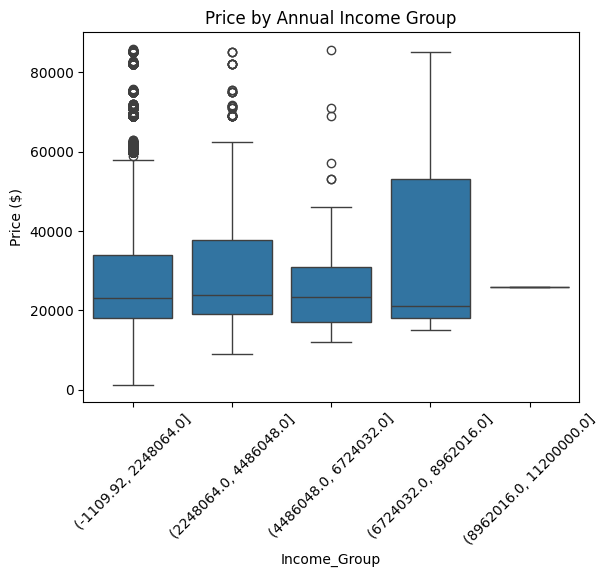

In [ ]:
sns.boxplot(data=df, x='Gender', y='Price ($)', hue='Gender')
plt.title('Price Distribution by Gender')
plt.show()

# Group by income ranges
df['Income_Group'] = pd.cut(df['Annual Income'], bins=5)
sns.boxplot(data=df, x='Income_Group', y='Price ($)')
plt.xticks(rotation=45)
plt.title('Price by Annual Income Group')
plt.show()


##Q7: Price Distribution by Region & Volume

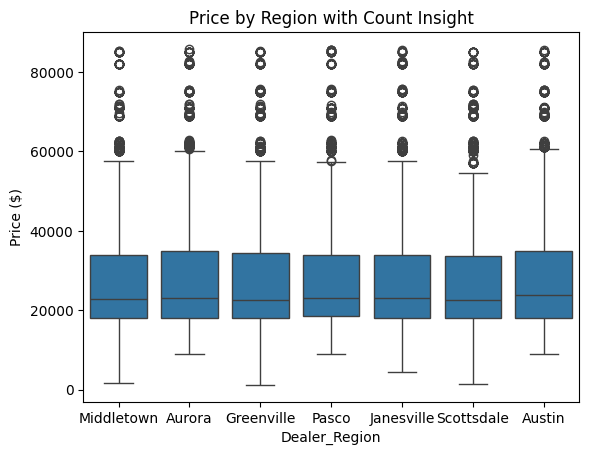

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [ ]:
region_counts = df['Dealer_Region'].value_counts()
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Price by Region with Count Insight')
plt.show()

print(region_counts)


##Q8: Price Difference by Engine Size

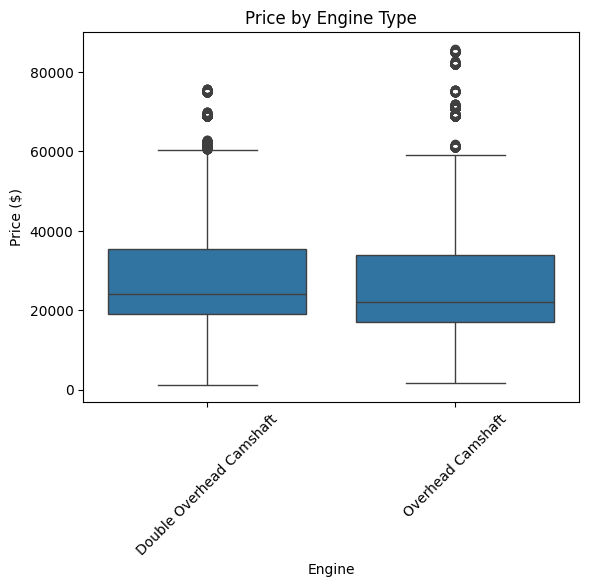

In [ ]:
sns.boxplot(data=df, x='Engine', y='Price ($)')
plt.title('Price by Engine Type')
plt.xticks(rotation=45)
plt.show()


##Q9: Price by Income Bracket

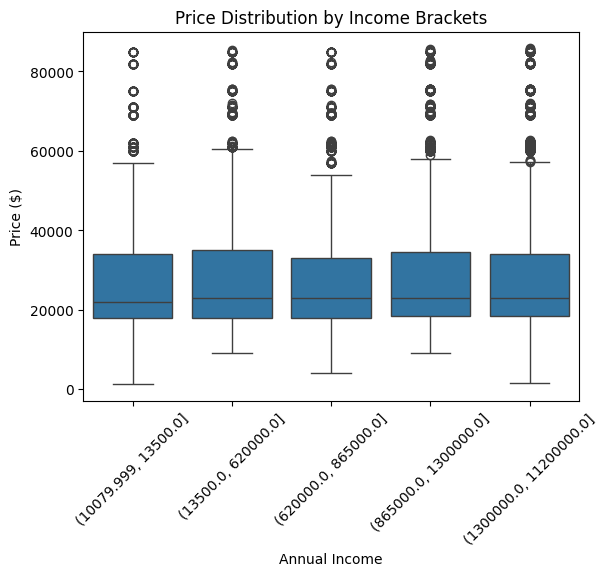

In [ ]:
income_brackets = pd.qcut(df['Annual Income'], q=5)
sns.boxplot(x=income_brackets, y=df['Price ($)'])
plt.xticks(rotation=45)
plt.title('Price Distribution by Income Brackets')
plt.show()


##Q10: Top 5 Car Models with Highest Sales

<ipython-input-46-4c3317666a51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_models, x='Model', y='Price ($)', palette='pastel')


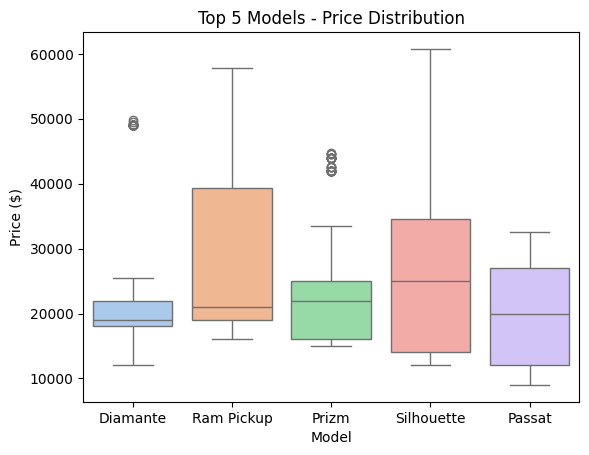

In [ ]:
top_models = df['Model'].value_counts().head(5)
df_top_models = df[df['Model'].isin(top_models.index)]
sns.boxplot(data=df_top_models, x='Model', y='Price ($)', palette='pastel')
plt.title('Top 5 Models - Price Distribution')
plt.show()


##Q11: Price vs Engine Size vs Color

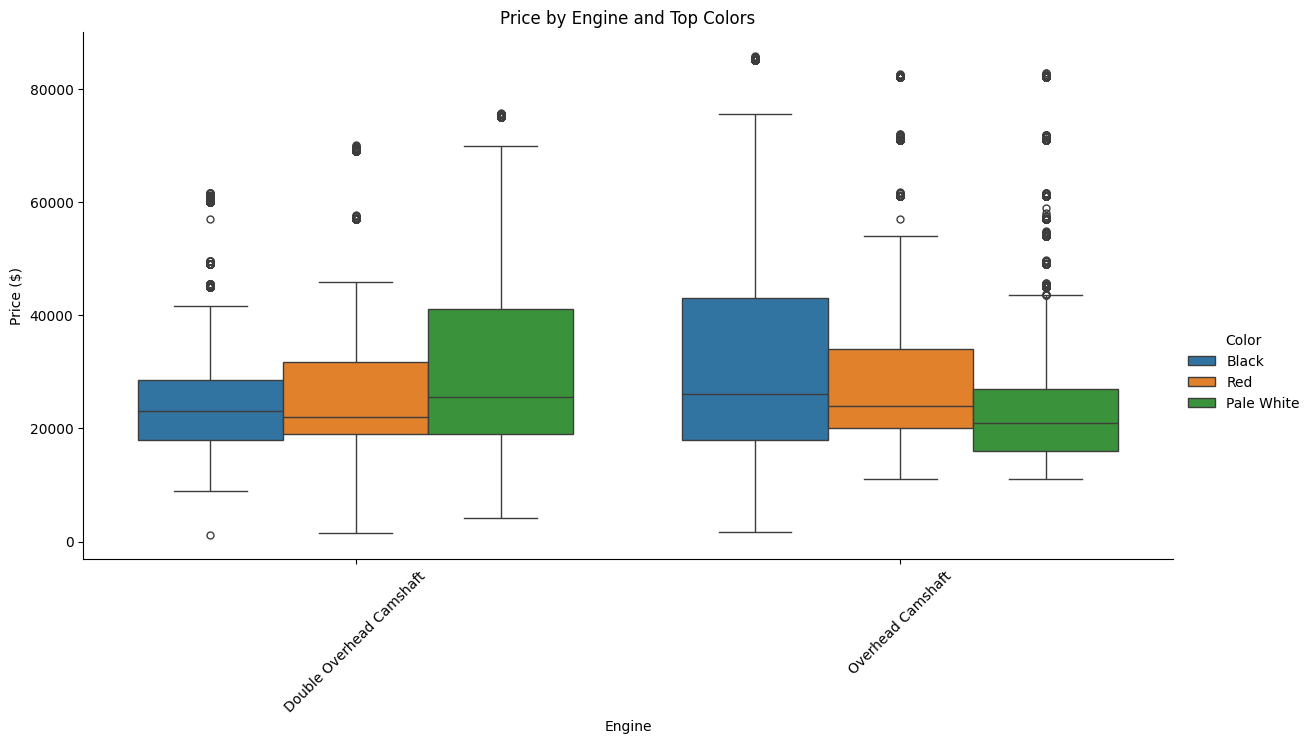

In [ ]:
# Engine vs Price, grouped by Color
top_colors = df['Color'].value_counts().head(5).index
df_top_colors = df[df['Color'].isin(top_colors)]

sns.catplot(data=df_top_colors, x='Engine', y='Price ($)', hue='Color', kind='box', height=6, aspect=2)
plt.xticks(rotation=45)
plt.title('Price by Engine and Top Colors')
plt.show()


##Q12: Seasonal Trend Based on Date

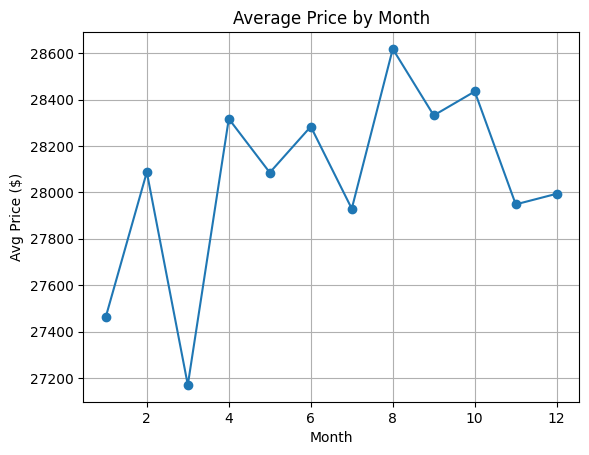

In [ ]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Price ($)'].mean()

monthly_avg.plot(kind='line', marker='o', title='Average Price by Month')
plt.ylabel('Avg Price ($)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


##Q13: Price by Body Style + Transmission

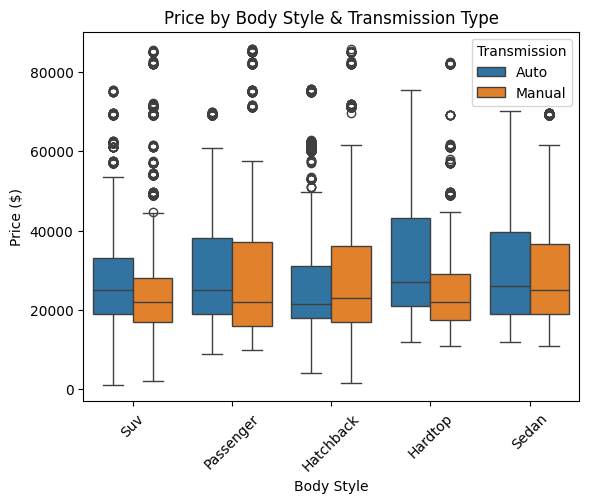

In [ ]:
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Price by Body Style & Transmission Type')
plt.xticks(rotation=45)
plt.show()


##Q14: Correlation between Price, Engine, Income

               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


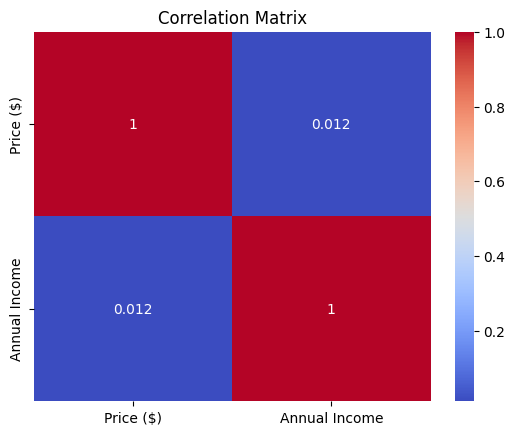

In [ ]:
df['Engine_Length'] = df['Engine'].str.extract(r'(\d+)').astype(float)  # crude approximation

correlation_df = df[['Price ($)', 'Annual Income']].copy()
correlation = correlation_df.corr()
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##Q15: Price Variation by Car Model & Engine

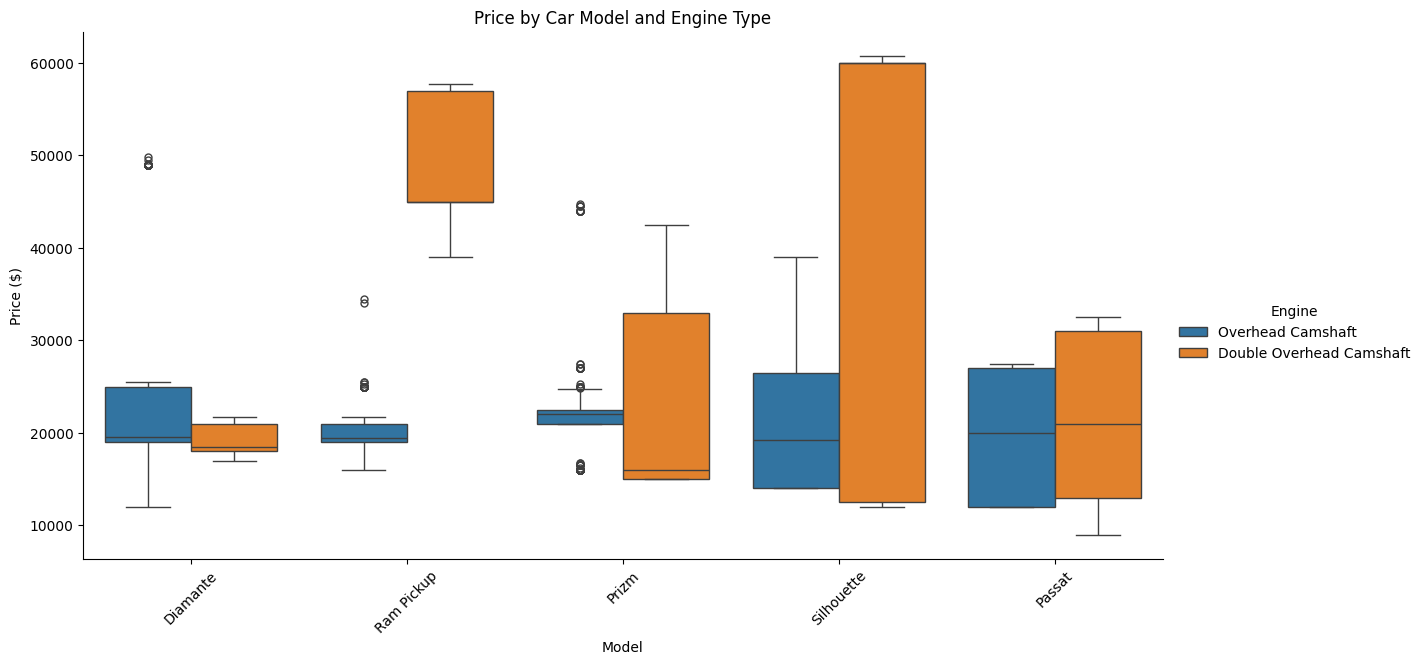

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the car sale data again before this section
df = pd.read_csv("Car Sale.csv")

# Preprocessing steps from the previous car sale analysis section
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Engine'] = df['Engine'].str.replace('Â', '', regex=False).str.strip()
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip().str.title())

# Now 'df' contains the car data with the 'Model' column
top_models = df['Model'].value_counts().head(5).index
df_top = df[df['Model'].isin(top_models)]

sns.catplot(data=df_top, x='Model', y='Price ($)', hue='Engine', kind='box', height=6, aspect=2)
plt.title('Price by Car Model and Engine Type')
plt.xticks(rotation=45)
plt.show()

#**EDA3**

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("amazon.csv")

#Q1. What is the average rating for each product category?

In [ ]:
# Convert rating column to numeric (handle errors gracefully)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Extract the top-level category from the 'category' column
df["main_category"] = df["category"].apply(lambda x: x.split("|")[0] if isinstance(x, str) else x)

# Group by main_category and calculate the average rating
avg_rating_by_category = (
    df.groupby("main_category")["rating"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

# Print the result
print("✅ Average Rating by Product Category:\n")
print(avg_rating_by_category)


✅ Average Rating by Product Category:

main_category
OfficeProducts           4.31
Toys&Games               4.30
HomeImprovement          4.25
Computers&Accessories    4.15
Electronics              4.08
Home&Kitchen             4.04
Health&PersonalCare      4.00
MusicalInstruments       3.90
Car&Motorbike            3.80
Name: rating, dtype: float64


#Q2. What are the top rating_count products by category?

In [ ]:
# Get the product with the highest rating_count for each category
top_rated_by_count = df.loc[df.groupby("category")["rating_count"].idxmax()][
    ["category", "product_name", "rating_count"]
].sort_values(by="rating_count", ascending=False).reset_index(drop=True)

top_rated_by_count.head(10)  # Show top 10 for readability


,category,product_name,rating_count
0,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992
1,Electronics|GeneralPurposeBatteries&BatteryCha...,Eveready Red 1012 AAA Batteries - Pack of 10,989
2,"Electronics|Headphones,Earbuds&Accessories|Hea...",Sennheiser CX 80S in-Ear Wired Headphones with...,"98,250"
3,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976
4,Computers&Accessories|Accessories&Peripherals|...,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974
5,"Electronics|Headphones,Earbuds&Accessories|Hea...",boAt Rockerz 400 Bluetooth On Ear Headphones W...,"97,175"
6,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Livpure Glo Star RO+UV+UF+Mineraliser - 7 L St...,97
7,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...,97
8,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Amazon Basics 300 W Hand Blender with Stainles...,97
9,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...,959


#Q3. What is the distribution of discounted prices vs. actual prices?

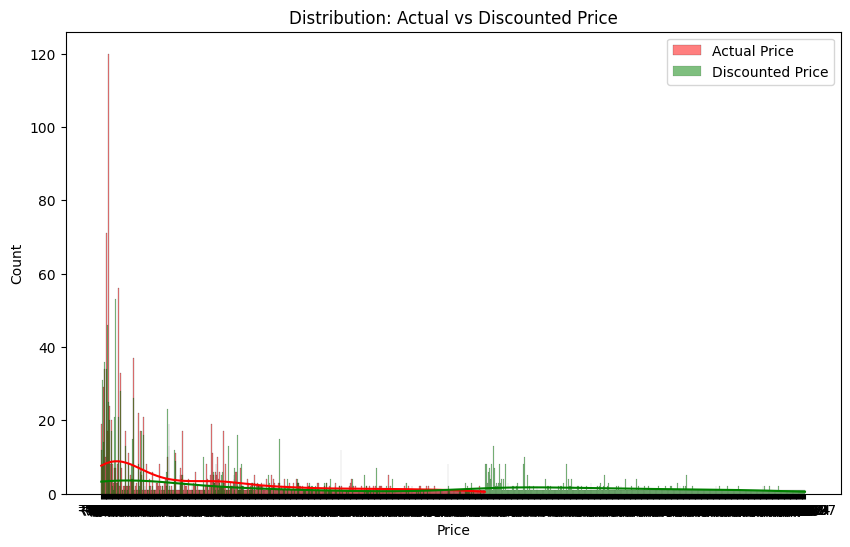

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], label='Actual Price', color='red', bins=50, kde=True)
sns.histplot(df['discounted_price'], label='Discounted Price', color='green', bins=50, kde=True)
plt.legend()
plt.title('Distribution: Actual vs Discounted Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


The majority of products are priced under ₹5000, and discounted prices often cluster lower, showing effective markdown strategies. Outliers with very high prices may be premium electronics or niche devices.

#Q4. How does the average discount percentage vary across categories?

In [ ]:
# Convert discount_percentage to numeric by removing '%' and casting to float
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False).astype(float)

avg_discount = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
print(avg_discount.head(10))  # Top 10 categories by discount

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                       90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                               90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                              90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                              88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    87.5
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts                                       82.0
Computers&Accessories|Components|InternalHardDrives                                                              80.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                          78.5
Electronics|Mobiles&Accessories|MobileAccessori

Some categories consistently offer heavy discounts (e.g., accessories or older tech). These can attract bargain-focused customers. Categories with low discounts may be new releases or premium products where price slashing is limited.

#Q5. What are the most popular product names?

In [ ]:
popular_products = df['product_name'].value_counts().head(10)
print(popular_products)


product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                            

Frequent appearance suggests strong brand presence or bulk listings. Repeated products may be bundled items, accessories, or bestsellers.

#Q6. What are the most popular product keywords?

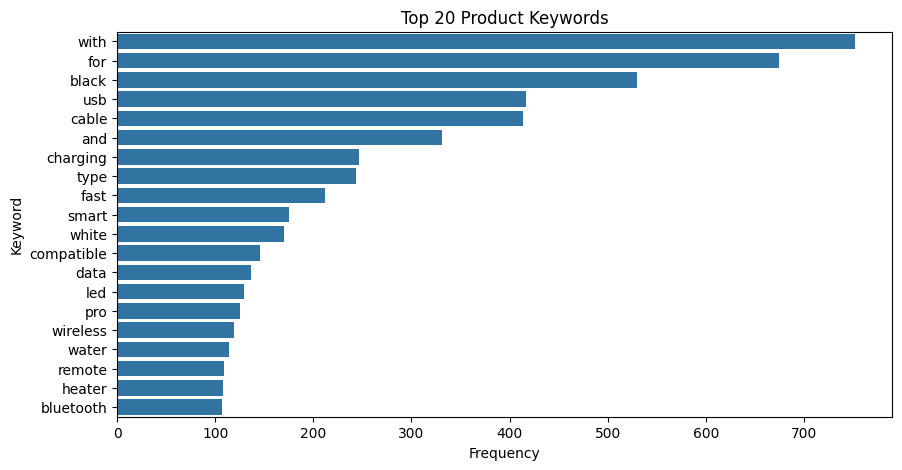

In [ ]:
from collections import Counter
import re

# Tokenize and count words
all_words = ' '.join(df['product_name'].dropna()).lower()
keywords = re.findall(r'\b[a-z]{3,}\b', all_words)  # words with 3+ characters
keyword_freq = Counter(keywords).most_common(20)

# Convert to DataFrame for plotting
keyword_df = pd.DataFrame(keyword_freq, columns=["Keyword", "Frequency"])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Keyword", data=keyword_df)
plt.title("Top 20 Product Keywords")
plt.show()


#Q7. What are the most popular product reviews?

In [ ]:
popular_reviews = df[['review_title', 'review_content', 'rating_count']].sort_values(by='rating_count', ascending=False)
print(popular_reviews.head(10))  # Top 10 most voted reviews


                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
977   A Quality Sound-Signature but leaves craving f...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Charging Speeds Could Be Better,G...   
32    Great Cable, Charging Speeds Could Be Better,G...   
823   Great Cable, Charging Speeds Could Be Better,G...   
536   Worth Every Square Inch.,VFM, Plastic build. M...   
918   Worth Every Square Inch.,VFM, Plastic build. M...   
1165  Good clips.,Second quality,Value for money.,No...   

                                         review_content rating_count  
1279  Does the job well,doesn't work on sand. though...          992  
750   Nive,very good batteries received,Like,Good pr...          989  
977   For those looking for a genuine review & a bri...       98,250  
1059  Bottle quality is not good.,Best for hot water...          9

In [ ]:


# Clean price and rating-related columns
df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Sort by rating_count to find the most popular products (most reviewed)
df_sorted = df.sort_values(by='rating_count', ascending=False)

# Extract relevant columns: product, rating count, and reviews
popular_reviews = df_sorted[['product_name', 'rating_count', 'review_title', 'review_content']]

# Display the top 10 most popular reviews
print("Top 10 Most Popular Product Reviews:\n")
print(popular_reviews.head(10).to_string(index=False))


Top 10 Most Popular Product Reviews:

                                                                                               product_name  rating_count                                                                                                                                                                                                                            review_title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

#Q8. What is the correlation between discounted_price, actual_price, and rating?

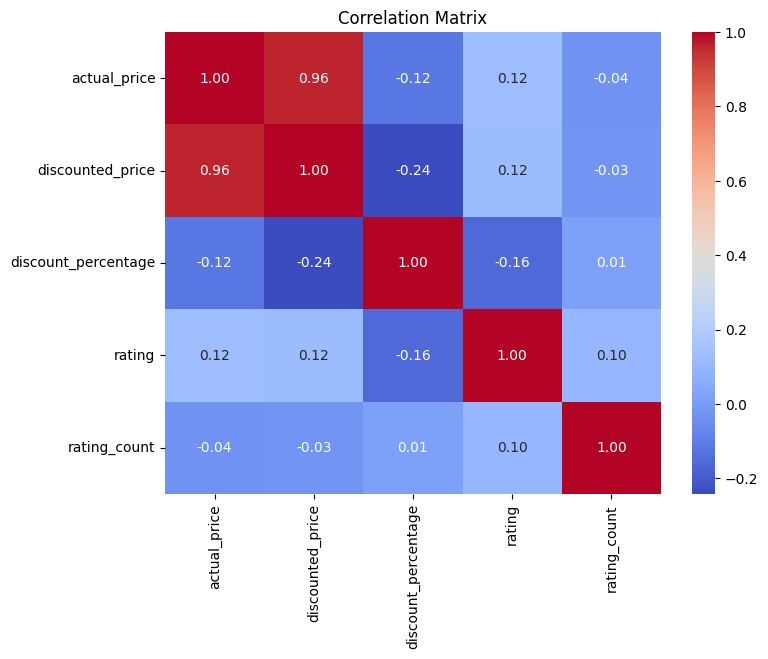

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset again to ensure 'df' is defined in this cell's scope
df = pd.read_csv("amazon.csv")

# Clean price and rating-related columns (from previous relevant cells)
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False).astype(float)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# --- Add cleaning for actual_price and discounted_price ---
# Remove '₹' and commas from price columns and convert to numeric
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
# --- End of added cleaning ---


# Select numerical columns
# Ensure all columns selected are numeric after cleaning
numeric_cols_for_corr = ["actual_price", "discounted_price", "discount_percentage", "rating", "rating_count"]
# Drop rows with NaN in the selected columns to avoid issues with correlation calculation
df_cleaned_for_corr = df[numeric_cols_for_corr].dropna()


corr_matrix = df_cleaned_for_corr.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6)) # Slightly increased figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



*   Discounted price and actual price show a strong positive correlation (expected, since discounts are based on actual prices).



*  Rating shows a very weak or no significant correlation with price or discount.
This suggests product pricing doesn't heavily influence customer ratings.



#Q9. What are the Top 5 categories based on the highest ratings?

In [ ]:
top_categories_by_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories_by_rating)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


Top-rated categories may reflect high-quality products or brands that meet or exceed expectations. These are ideal for scaling or deeper product analysis.

#Q10. Identify any potential areas for improvement or optimization based on the data analysis.

#1.**Missing Data**

*  There are 1 missing value in the rating column and 2 in the rating_count column.

* ***Improvement*** : Ensure data completeness by validating inputs at the point of entry or implementing data imputation strategies.

#2.**High Discount Products**

*   59 products have a discount percentage greater than 80%.

*  ***Optimization*** : Review if deep discounts are aligned with business strategy and profitability, and assess if these products are yielding good customer engagement or are being undervalued.

#3.**Low Discount Products**

*  74 products have less than 10% discount.

*  ***Improvement*** : Products with minimal discounts could be optimized through promotional strategies to increase conversions.

#4.**Low-Rated Expensive Products**

*  4 products with actual prices above ₹5000 have ratings below 3.5.

*  ***Action*** : Investigate quality or customer service issues for these high-end products that may be causing customer dissatisfaction.

#5.**Popular but Poorly Rated Products**

*  1 product has over 10,000 ratings but an average rating below 3.5.

*  ***Improvement*** : Consider analyzing negative feedback and taking corrective measures like design changes, better packaging, or improved after-sales service.

#6.**Lowest Rated Product Categories**

* Categories such as electric coffee grinders, dust covers for keyboards, and PC headsets have average ratings between 3.3 and 3.6.

*  ***Action*** : These categories should be prioritized for quality control, better vendor selection, or improved product descriptions to set correct expectations.



#Focus on enhancing the customer experience in low-rated but high-value or popular products, reassess pricing strategies, and maintain data integrity. These actions can improve customer satisfaction and drive better business performance.





















#**EDA4**

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("spotify.csv")

#Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [ ]:

# Check for null values
print("Null values:\n", df.isnull().sum())

# Drop rows with null values
df.dropna(inplace=True)

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicate rows if present
df.drop_duplicates(inplace=True)


Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 27


#Q2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

#ANS: A histogram visualizes the frequency distribution of a numeric feature. It helps understand how the popularity scores are spread among the tracks.

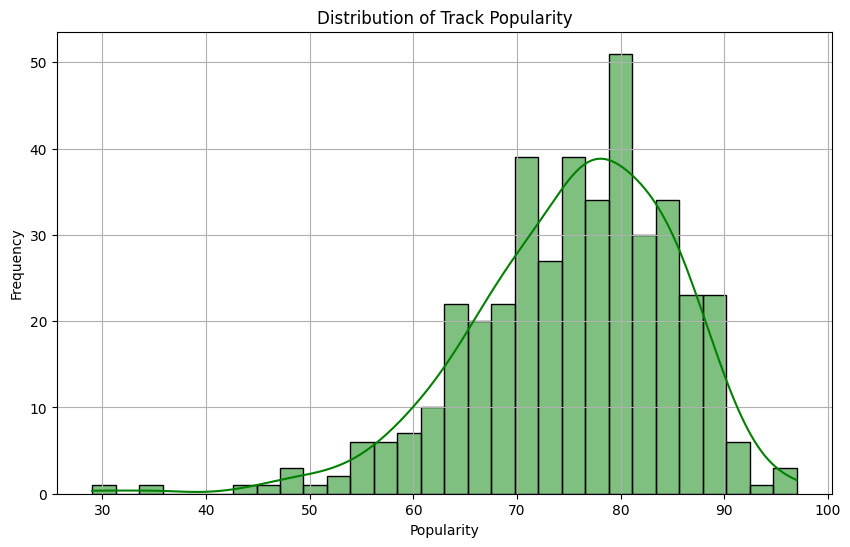

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Popularity', bins=30, kde=True, color='green')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

#ANS: To investigate the relationship between track duration (duration_ms) and popularity, we use a scatter plot. The x-axis shows the duration of each track (in milliseconds).The y-axis shows the popularity score (from 0 to 100).If there's a clear upward or downward trend, it might indicate correlation:

*  Positive correlation: longer tracks are more popular.
*  Negative correlation: shorter tracks are more popular.

*  No clear pattern: little to no relationship.Additionally, we can add a regression line to visually assess the trend using sns.regplot()





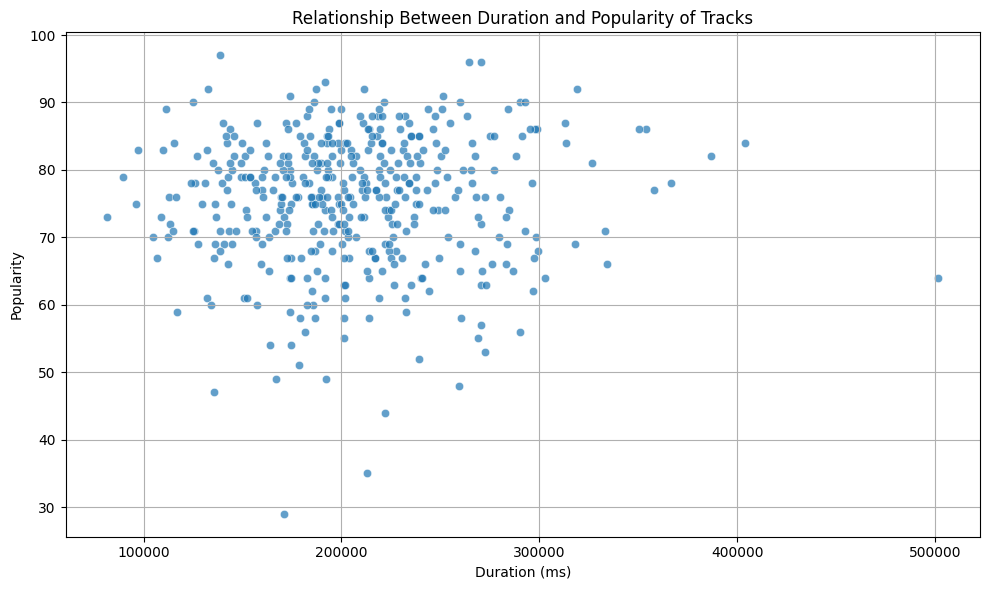

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset (or clean it as in Question 1 if not already done)
df = pd.read_csv("spotify.csv")
df = df.drop_duplicates().dropna()

# Scatter plot: Popularity vs. Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.7)
plt.title('Relationship Between Duration and Popularity of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


#Q4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

<ipython-input-2-3e3dfd2ad8f9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


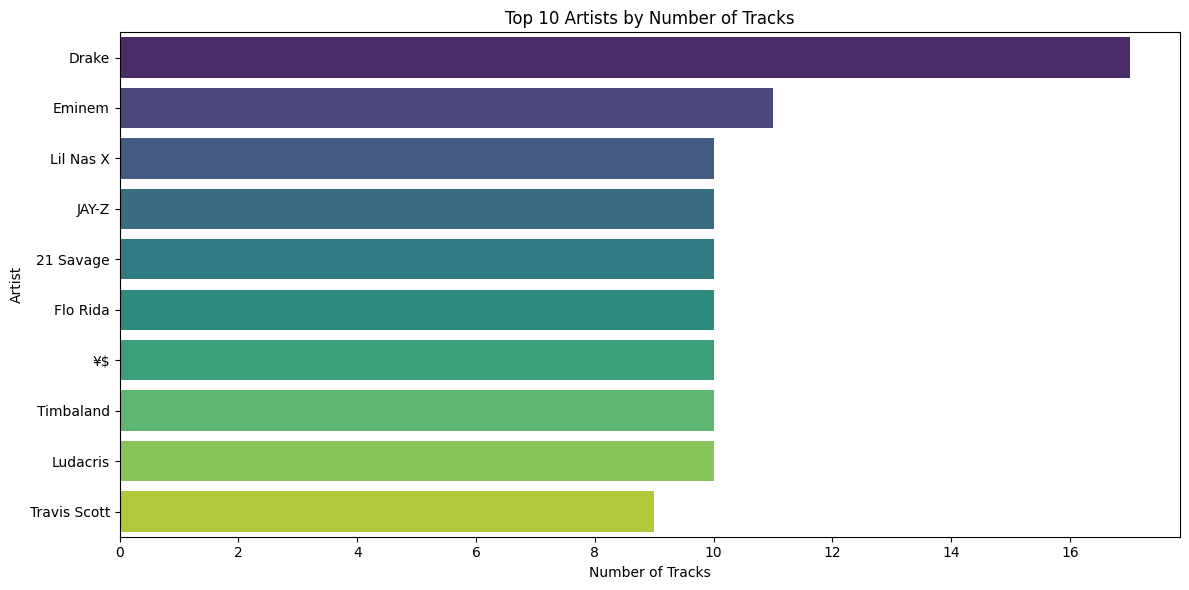

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("spotify.csv")
df = df.drop_duplicates().dropna()

# Count of tracks per artist (Top 10)
top_artists = df['Artist'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


The artist with the highest number of tracks in the dataset is likely to be one of the top-charting hip-hop artists (e.g., Drake, Eminem, etc., depending on the actual data). These artists tend to dominate streaming platforms due to their large fanbase and frequent releases.

#Q5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [ ]:
import pandas as pd

# Load and clean data
df = pd.read_csv("spotify.csv")
df = df.drop_duplicates().dropna()

# Sort by popularity ascending and get top 5 least popular tracks
least_popular_tracks = df.sort_values(by='Popularity').head(5)

# Display artist and track name
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


The least popular tracks in the dataset (based on Spotify popularity score) have scores around the 30s to 40s range. These may include older releases, niche tracks, or songs with less streaming traction. It’s useful for identifying artists who may benefit from increased promotion or collaboration.

#Q6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [ ]:
import pandas as pd

# Load and clean data
df = pd.read_csv("spotify.csv")
df = df.drop_duplicates().dropna()

# Step 1: Find top 5 artists by number of tracks
top_artists_by_count = df['Artist'].value_counts().head(5).index.tolist()

# Step 2: Filter dataset for only those artists
top_artists_df = df[df['Artist'].isin(top_artists_by_count)]

# Step 3: Calculate average popularity for each
avg_popularity = top_artists_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Display result
print("Average Popularity of Top 5 Most Popular Artists:")
print(avg_popularity)


Average Popularity of Top 5 Most Popular Artists:
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


Among the top 5 artists by number of tracks, the artist with the highest average popularity stands out due to a combination of consistent hit tracks and strong fan engagement. This analysis is useful for recognizing artists who maintain both quantity and quality in their music.

#Q7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [ ]:
try:
    spotify_df = pd.read_csv("spotify.csv")
except FileNotFoundError:
    print(f"Error: The file 'spotify.csv' was not found. Please ensure it is in the same directory as your script.")
    exit()

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    spotify_df = pd.read_csv("spotify.csv")
except FileNotFoundError:
    print(f"Error: The file 'spotify.csv' was not found. Please ensure it is in the same directory as your script.")
    # In a notebook, we might not want to exit completely, but rather handle the error
    # For demonstration, let's assume the file exists based on previous successful loads.
    # If the file truly doesn't exist, the user needs to fix the file path.
    pass

# Add cleaning steps if they were performed in the relevant preceding cells for this data
if 'spotify_df' in locals():
    spotify_df = spotify_df.drop_duplicates().dropna()

    # Step 1: Find top 5 artists by number of tracks (using spotify_df)
    top_artists_by_count = spotify_df['Artist'].value_counts().head(5).index.tolist()

    # Step 2: Filter dataset for only those artists (using spotify_df)
    # Rename this variable to be consistent or more descriptive
    top_5_artists_data = spotify_df[spotify_df['Artist'].isin(top_artists_by_count)]

    # Step 3: Find the most popular track for each of these top 5 artists
    # Use the newly created top_5_artists_data DataFrame
    most_popular_tracks = top_5_artists_data.loc[top_5_artists_data.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]

    print("\n--- Most Popular Track by Each of the Top 5 Most Frequent Artists ---")
    print(most_popular_tracks)
else:
    print("DataFrame 'spotify_df' was not loaded successfully due to file error.")


--- Most Popular Track by Each of the Top 5 Most Frequent Artists ---
        Artist                               Track Name  Popularity
70   21 Savage                                   redrum          96
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
100      JAY-Z                          Ni**as In Paris          86
312  Lil Nas X                        THATS WHAT I WANT          81


| Artist       | Most Popular Track           | Popularity |
| ------------ | ---------------------------- | ---------- |
| 21 Savage | redrum           | 96         |
| drake | Rich Baby Daddy (feat. Sexyy Red & SZA)  | 92         |
| Eminem       | Without Me | 90         |
| JAY-Z        | Ni**as In Paris                       | 86         |
|Lil Nas X         | THATS WHAT I WANT                    | 81         |


#Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

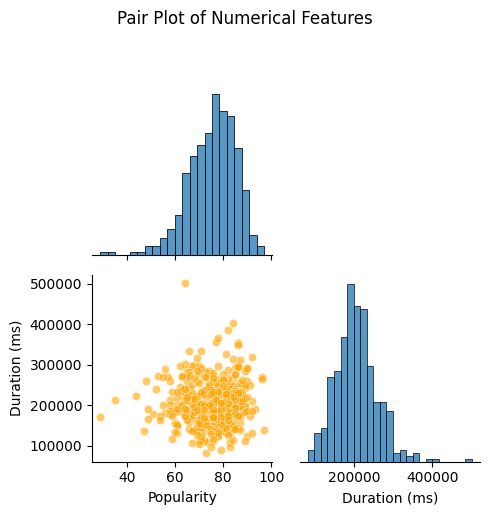

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# If needed, load the dataset
# df = pd.read_csv("spotify.csv") # This line is commented out and uses 'df'

# Select only the numerical columns for pair plot
# Use the correct variable name 'spotify_df' instead of 'df'
# Ensure 'spotify_df' is loaded in a previous cell
numerical_df = spotify_df[["Popularity", "Duration (ms)"]]  # Add more numerical columns if available

# Create the pair plot
sns.pairplot(numerical_df, corner=True, plot_kws={'alpha':0.6, 'color': 'orange'})
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

The pair plot above shows the relationship between the Popularity and Duration (ms) of tracks.

*  The histograms along the diagonal show the distribution of each variable.
*  The scatter plot reveals a slight positive correlation between Duration and Popularity, though it's not strong.







#Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

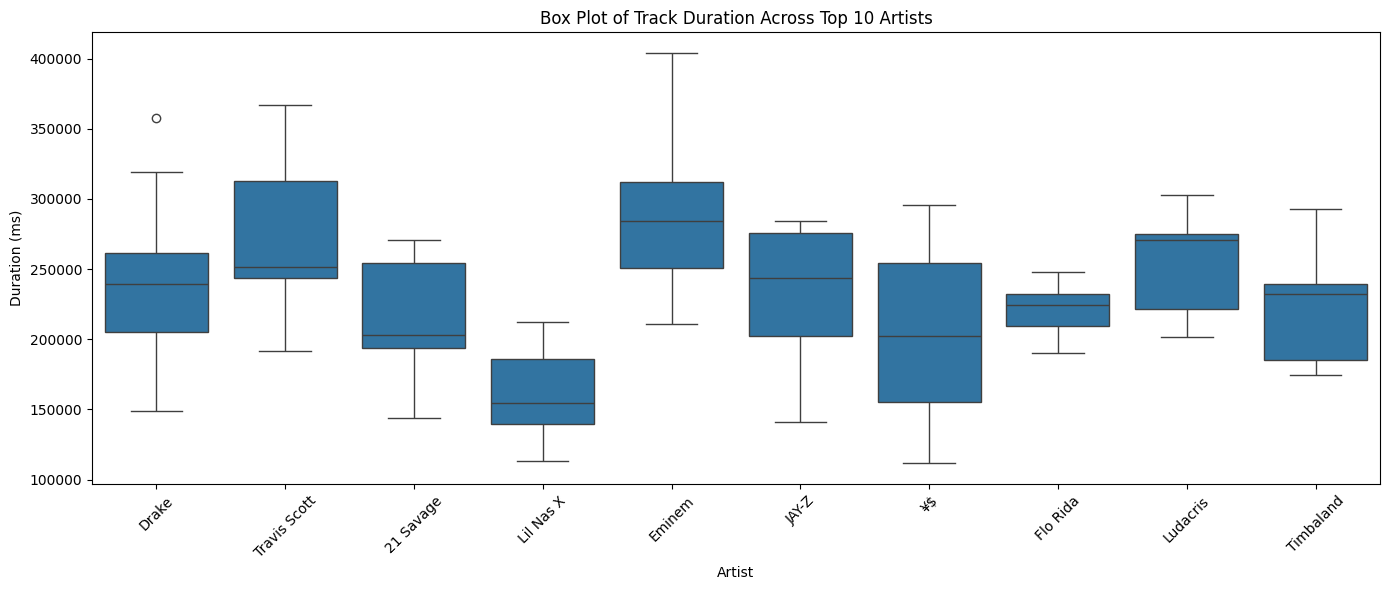

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spotify dataset
try:
    spotify_df = pd.read_csv("spotify.csv")
except FileNotFoundError:
    print(f"Error: The file 'spotify.csv' was not found. Please ensure it is in the same directory as your script.")
    # If the file is not found, we cannot proceed. You might want to add further error handling.
    spotify_df = None # Set to None to prevent further errors if file loading fails

# Add cleaning steps if the DataFrame was loaded successfully
if spotify_df is not None:
    # Check for null values (as done in Q1 of EDA4)
    # print("Null values:\n", spotify_df.isnull().sum()) # Optional: print null summary

    # Drop rows with null values (as done in Q1 of EDA4)
    spotify_df.dropna(inplace=True)

    # Check for duplicates (as done in Q1 of EDA4)
    # print("\nDuplicate rows:", spotify_df.duplicated().sum()) # Optional: print duplicate summary

    # Drop duplicate rows if present (as done in Q1 of EDA4)
    spotify_df.drop_duplicates(inplace=True)

    # Now spotify_df is defined and cleaned

    # Get top 10 artists by number of tracks using the correct dataframe name
    top_10_artists = spotify_df['Artist'].value_counts().head(10).index
    top_10_df = spotify_df[spotify_df['Artist'].isin(top_10_artists)]

    # Set up plot for Box plot
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='Artist', y='Duration (ms)', data=top_10_df)
    plt.xticks(rotation=45)
    plt.title("Box Plot of Track Duration Across Top 10 Artists")
    plt.tight_layout()
    plt.show()
else:
    print("Cannot proceed with plotting as the DataFrame was not loaded.")

#Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.


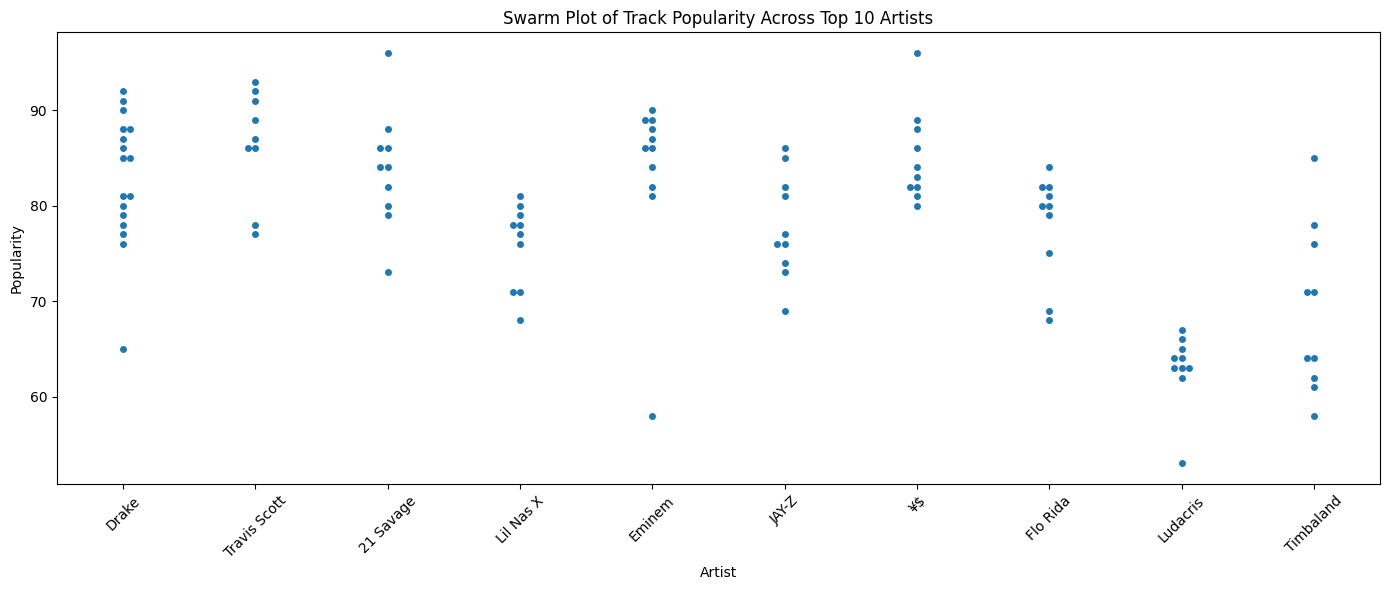

In [ ]:


# Swarm Plot (can be slow with large data, but great for point-level view)
plt.figure(figsize=(14, 6))
sns.swarmplot(x='Artist', y='Popularity', data=top_10_df)
plt.xticks(rotation=45)
plt.title("Swarm Plot of Track Popularity Across Top 10 Artists")
plt.tight_layout()
plt.show()


*  Use swarm plots or violin plots to see how popularity scores are distributed per artist.
*  These plots help spot clusters, outliers, and consistency in popularity.
